In [1]:
import sys; sys.path.insert(0, '..')
from fimdp.consMDP import ConsMDP
from fimdp import dot
from fimdp import energy_solver
dot.dotpr = 'neato'
from fimdp import fixpoints

In [2]:
def consMDP_flower(cap=8):
    m = ConsMDP()
    m.new_states(2)
    m.add_action(1,{0:1},"a",1)
    m.add_action(0,{1:1},"t",cap)
    m.set_reload(1)

    for c in range(1,cap):
        s = m.new_state(reload=True)
        m.add_action(0,{s:1},f"{s}",cap-c)
        m.add_action(s,{0:1},"a",c-1)
    return m

[1, 0, 0, 0, 0, 0, 0, 0, 0]


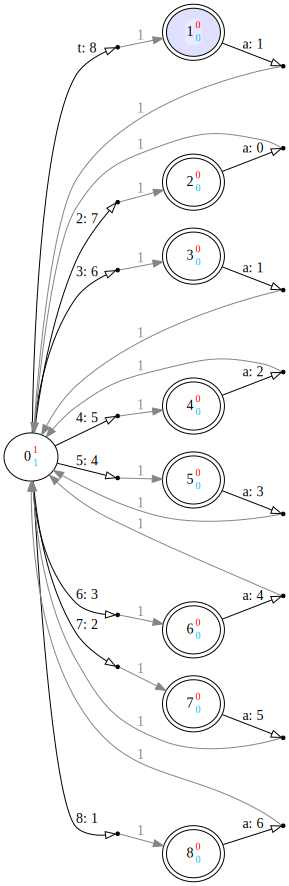

In [3]:
m = consMDP_flower()
print(m.get_positiveReachability(set([1]), 8))
m

## Double flower shaped consMDP
Computing positive reachability may involve up to quadratic number of fixpoint-iterations (and thus cubic complexity in general). To be more precise, for $R$ being the set of reloads and $Q$ being the set of non-reload staes, the number of iterations $i$ is:
$$
i = |R| \cdot \frac{|P|}{2}
$$

In [4]:
def consMDP_double_flower(cap=32,path=3):
    m = ConsMDP()
    m.new_states(2)
    #m.add_action(1,{0:1},"a",1)
    #m.add_action(0,{1:1},"t",cap)

    for c in range(2,cap, 2):
        s = m.new_state(reload=True, label = f"{c}")
        h = (c//2) % 2
        m.add_action(h,{s:1},f"{s}",cap-c)
        m.add_action(s,{h:1},"a",c-1)
        
    prev_o = 1
    prev_e = 0
    for p in range(path):
        curr_o = m.new_state()
        curr_e = m.new_state()

        m.add_action(prev_o,{curr_o:1},"p",0)
        m.add_action(prev_e,{curr_e:1},"p",0)
        
        prev_o = curr_o
        prev_e = curr_e
        
    m.add_action(prev_o,{0:1},"p",1)
    m.add_action(prev_e,{1:1},"p",1)
    
    return m

[31, 30, 0, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 32, 31, 32, 31, 32, 31, 32, 31, 32, 31, 32, 31]


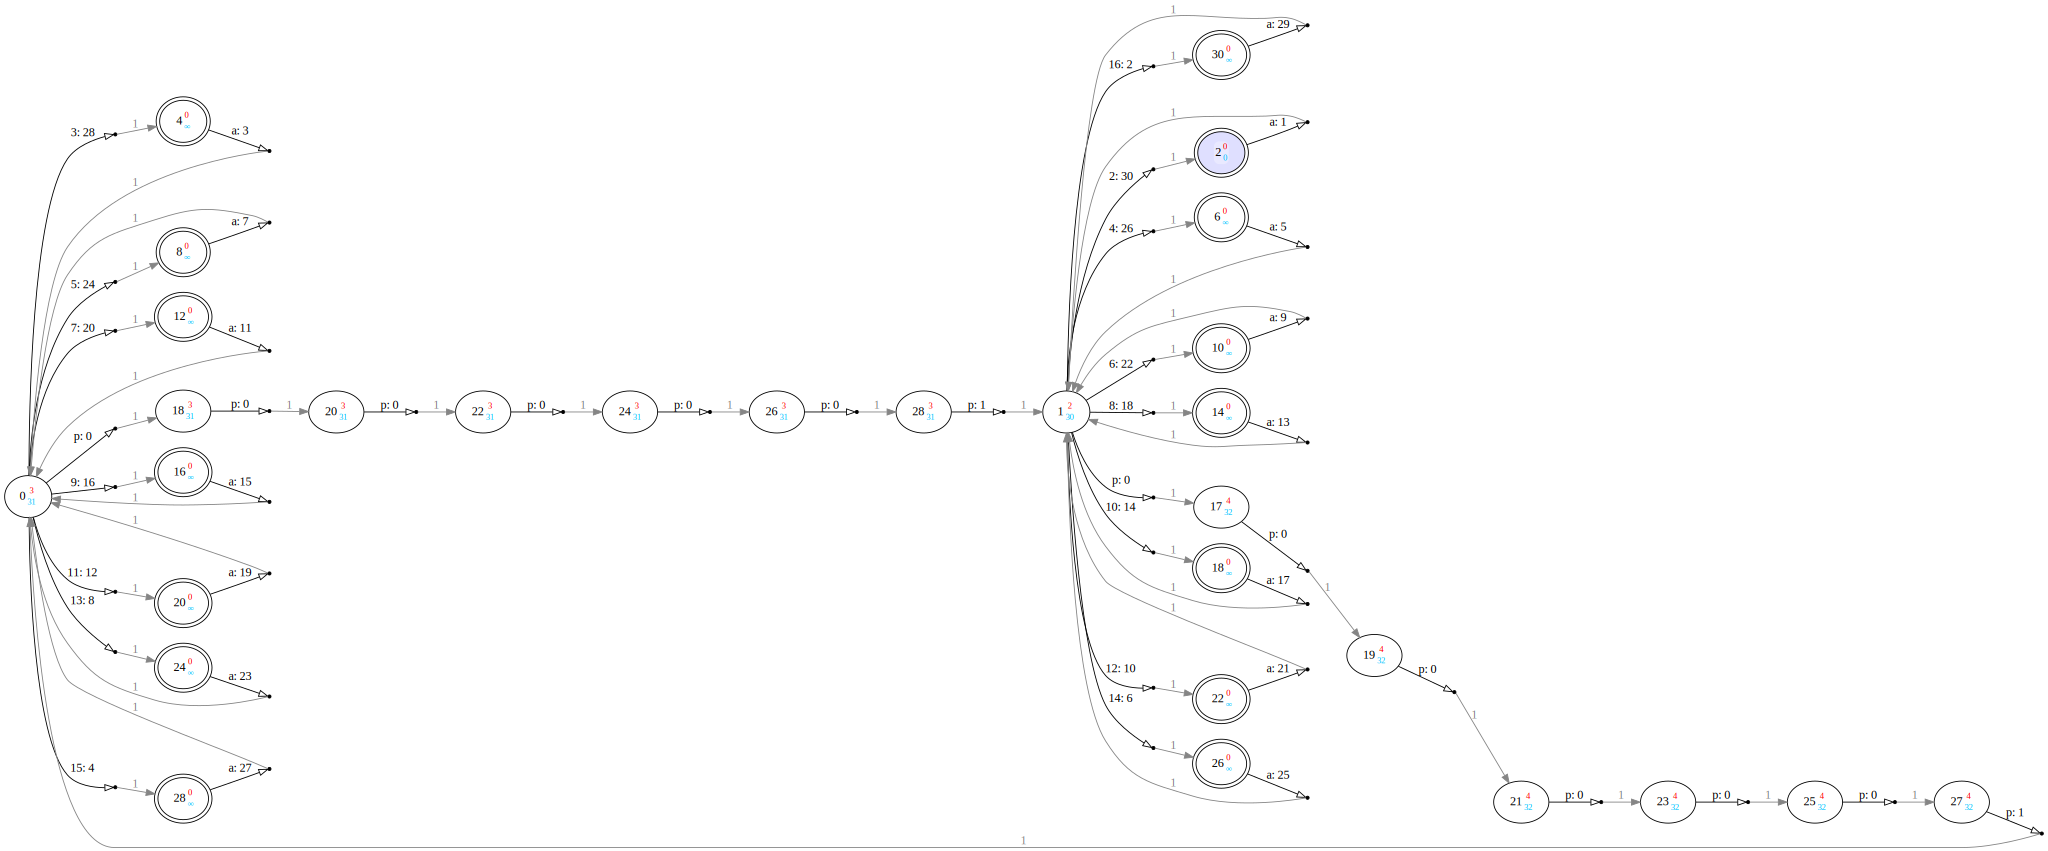

In [5]:
cap = 32 # We have cap/2 reload states, cap/4 in each flower
path = 6
m = consMDP_double_flower(cap, path)
# This will yield ∞ for most states, we need at least cap+2
print(m.get_positiveReachability(set([2]), cap))
m

[3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3]


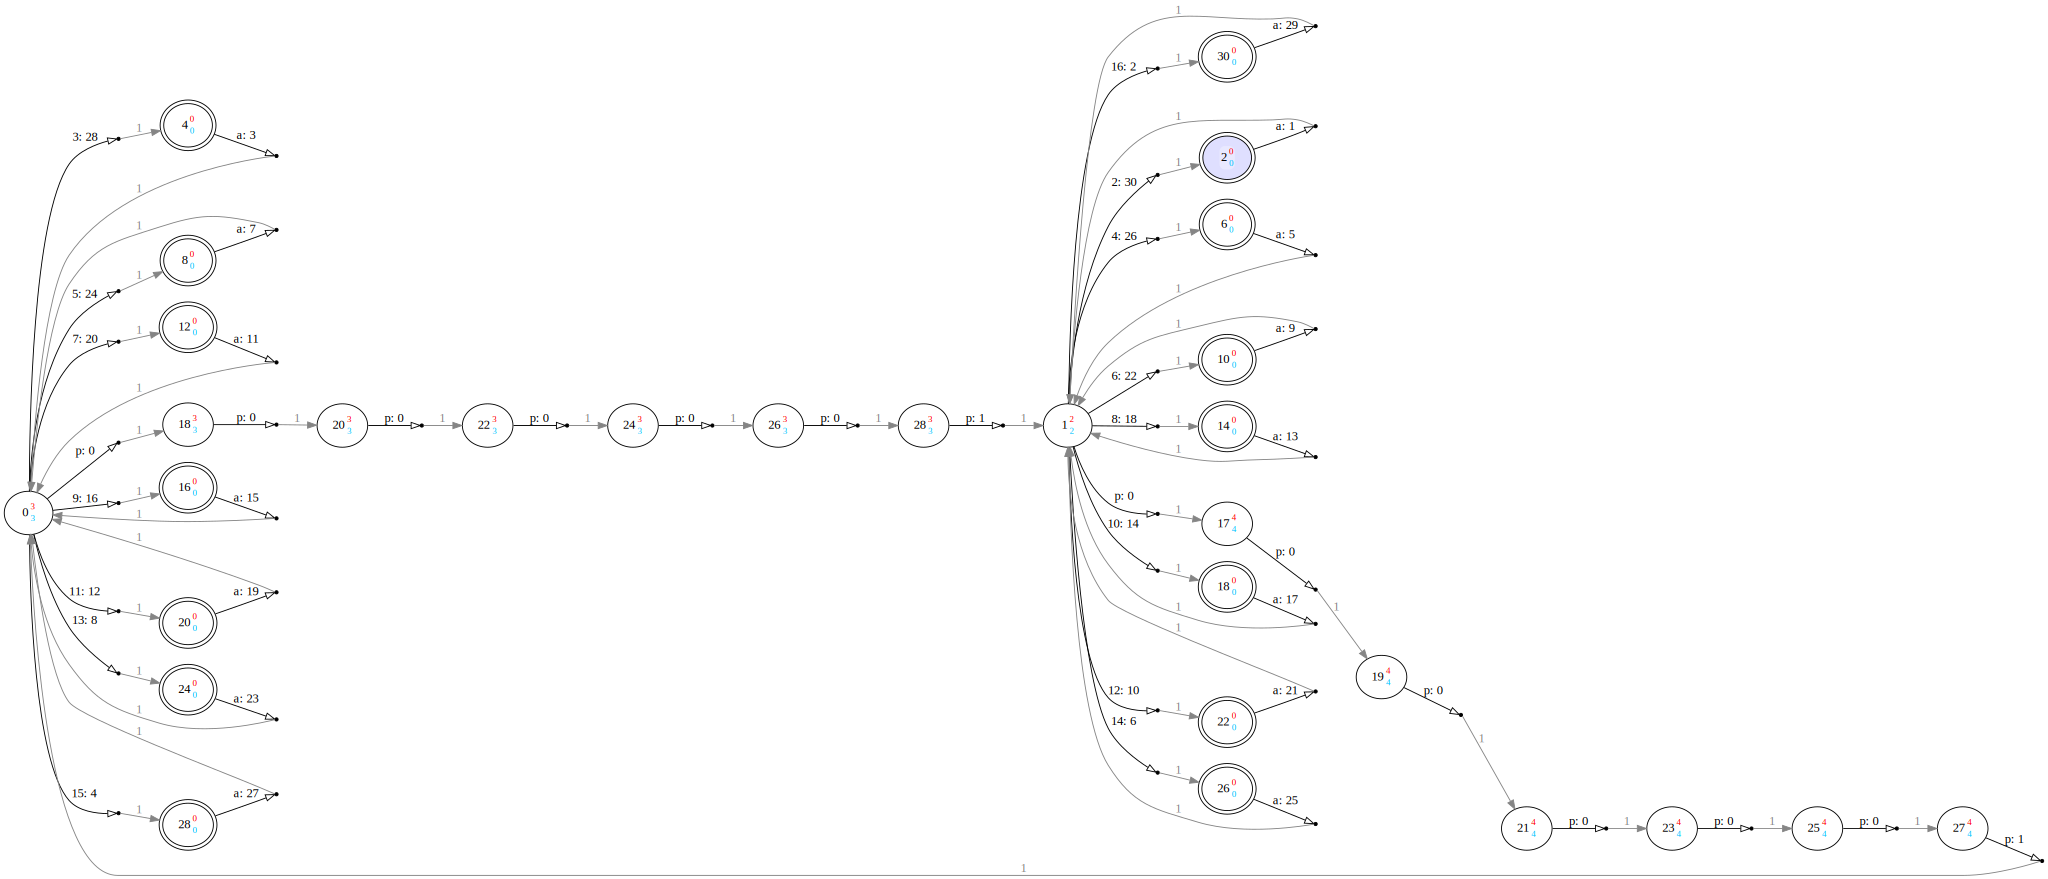

In [6]:
# Let's see the number of iterations needed
fixpoints.debug = True
print(m.get_positiveReachability(set([2]), cap+2))
m

### Visual evolution of the computation
Let's have some smaller double-flower and see the results step-by-step

In [7]:
cap = 16 # We have cap/2 reload states, cap/4 in each flower
path = 3
m = consMDP_double_flower(cap, path)

el = energy_solver.EnergySolver(m, cap+2, set([2]))
m.energy_levels = el # For visualization
m.get_minInitCons()

# First compute Safe reloads without visualization
fixpoints.debug=False
fixpoints.debug_vis=True
dot.default_options="ms"
el.get_safe()

[3, 2, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 3, 4, 3]

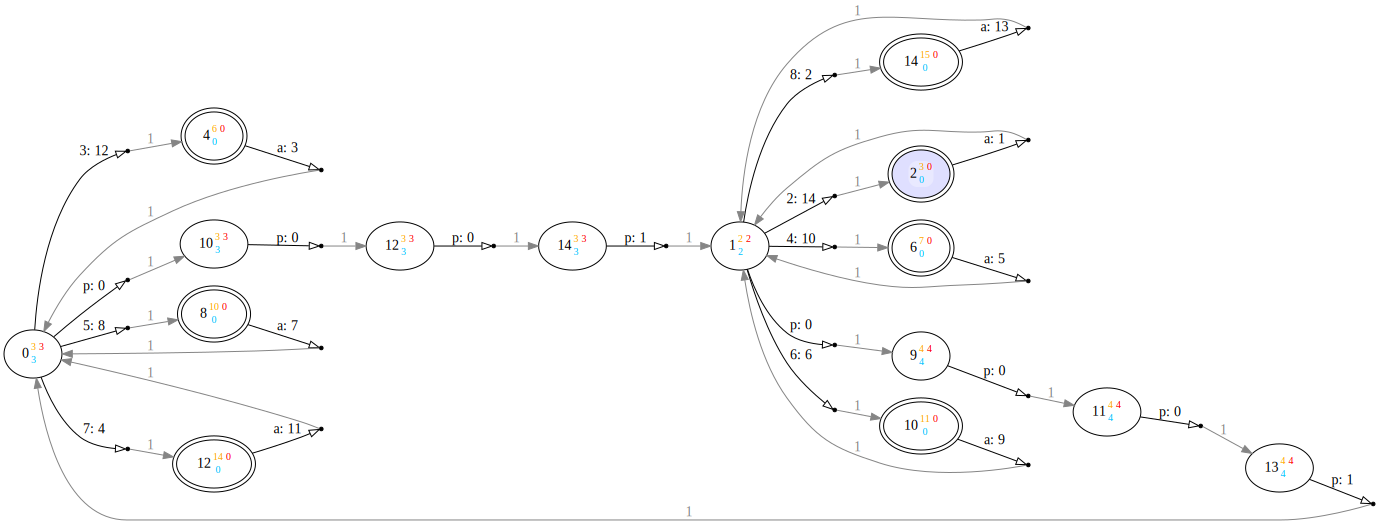

In [8]:
# safety.debug_vis=True
fixpoints.debug_vis=True
el.get_positiveReachability()
m

In [9]:
el.get_almostSureReachability()

[3, 2, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 3, 4, 3]